## Explatory Data Analysis



#### Birthweight data

Variables in the data are as follows:


|     Name                 |     Variable                                           |     Data type    |
|--------------------------|--------------------------------------------------------|------------------|
|     ID                   |     Baby number                                        |                  |
|      length              |     Length of baby (cm)                                |     Scale        |
|      Birthweight         |     Weight of baby (kg)                                |     Scale        |
|      headcirumference    |     Head Circumference                                 |     Scale        |
|      Gestation           |     Gestation (weeks)                                  |     Scale        |
|      smoker              |     Mother smokes 1 = smoker 0 =   non-smoker          |      Binary      |
|      motherage           |     Maternal age                                       |     Scale        |
|      mnocig              |     Number of cigarettes smoked per day   by mother    |     Scale        |
|      mheight             |     Mothers height (cm)                                |      Scale       |
|      mppwt               |     Mothers pre-pregnancy weight (kg)                  |      Scale       |
|      fage                |     Father's age                                       |      Scale       |
|     fedyrs               |     Father’s years in education                        |     Scale        |
|      fnocig              |     Number of cigarettes smoked per day   by father    |     Scale        |
|      fheight             |     Father's height (cm)                               |      Scale       |
|      lowbwt              |     Low birth weight, 0 = No and 1 = yes               |      Binary      |
|     mage35               |     Mother over 35, 0 = No and 1 = yes                 |     Binary       |

 
Birthweight is the dependent variable. Lets first investigate this variable.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/Birthweight_reduced_kg_R.csv')
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [15]:
data = df[['Length','Birthweight','Headcirc','mage', 'fage', 'mheight', 'fheight']]
pearson_corr = data.corr()

pearson_corr

,Length,Birthweight,Headcirc,mage,fage,mheight,fheight
Length,1.000000,0.726833,0.563172,0.075268,0.137184,0.484992,0.208358
Birthweight,0.726833,1.000000,0.684616,0.000173,0.175710,0.363055,0.031022
Headcirc,0.563172,0.684616,1.000000,0.145842,0.301151,0.337047,0.041509
mage,0.075268,0.000173,0.145842,1.000000,0.806584,0.059956,-0.199547
fage,0.137184,0.175710,0.301151,0.806584,1.000000,-0.079870,-0.269377
mheight,0.484992,0.363055,0.337047,0.059956,-0.079870,1.000000,0.274338
fheight,0.208358,0.031022,0.041509,-0.199547,-0.269377,0.274338,1.000000


Now, lets show this correlation on a heatmap for easier interpretation.

C:\Users\kamas\AppData\Local\Temp\ipykernel_10556\1407800231.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns, rotation=65, fontsize=15)
C:\Users\kamas\AppData\Local\Temp\ipykernel_10556\1407800231.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data.columns, rotation=0, fontsize=15)


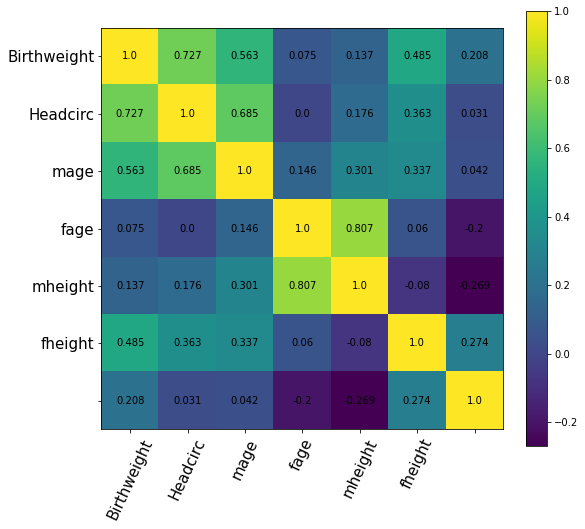

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(pearson_corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

# there is a problem here!!!!
# The tick labels do not start from length
# Show all ticks and label them with the dataframe column name
ax.set_xticklabels(data.columns, rotation=65, fontsize=15)
ax.set_yticklabels(data.columns, rotation=0, fontsize=15)

# Loop over data dimensions and create text annotations
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        text = ax.text(j, i, round(pearson_corr.to_numpy()[i, j], 3),
                       ha="center", va="center", color="black")

plt.show()

Now, lets build a linear regression model that correlates birthweight with mothers age and fathers age

In [28]:
from sklearn import linear_model 

X = data[['mage', 'fage']]
y = data['Birthweight'] 

reg_model = linear_model.LinearRegression()
reg_model.fit(X, y) 

print(reg_model.coef_)


[-0.04317422  0.04420732]


In [52]:
d = df[df.ID==1360]

print(d[['Birthweight', 'mage', 'fage']])

pred = reg_model.predict(d[['mage', 'fage']])

print(f"Real: {d.to_numpy()[0, 2]}  Predicted: {pred[0]:.2f}")


   Birthweight  mage  fage
0         4.55    20    23
Real: 4.55  Predicted: 3.29


In [55]:
from sklearn import linear_model 

X = data[['mheight', 'fheight']]
y = data['Birthweight'] 

reg_model2 = linear_model.LinearRegression()
reg_model2.fit(X, y) 

print(reg_model2.coef_)

d = df[df.ID==1360]

print(d[['Birthweight', 'mheight', 'fheight']])

pred = reg_model2.predict(d[['mheight', 'fheight']])

print(f"Real: {d.to_numpy()[0, 2]}  Predicted: {pred[0]:.2f}")

[ 0.03559835 -0.00641771]
   Birthweight  mheight  fheight
0         4.55      162      179
Real: 4.55  Predicted: 3.24
